![uc3m](img/uc3m.jpg)

# Portfolio Optimization

<a href="http://www.est.uc3m.es/nogales" target="_blank">Javier Nogales</a>

The problem is the basis of an investment theory where risk-averse investors can construct portfolios to maximize expected return based on a given level of market risk. It is one of the most important and influential economic theories that quantifies the benefits of **diversification**, also known as *not putting all of your eggs in one basket*

![s](img/strategy.jpg)

## Summary

An investor has $n$ available assets to invest her money. The return for each asset is denoted by $R_i$ 


The decision variables are denoted by $x$, where each $x_i$ denotes the portfolio weight for investment $i$

The portfolio optimization model is:


<img src="img/portfolio.png" width="500">



## Download data automatically from Yahoo Finance



In [1]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#list of stocks in portfolio

# Enter here your favourite stocks in alphabetical order
stocks = ['AAPL','AMZN','GOOG','GC=F']

# You can add much more assets (bonds, currencies, commodities, ETFs, etc.)
# '^TNX': Treasury Yield 10 Years
# 'BTC-USD': Bitcoin USD
# 'GC=F': Gold
# 'SPY': S&P500 ETF
# 'TEF.MC': Telefónica, Spain
    

# Download automatically daily prices for each of the stocks from our desired start date 
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2020',end="31/12/2020")['Adj Close']
data.sort_index(inplace=True)

display(data)

# Adjusted Close is the close price that adjusts the price for dividends and splits

# Convert stock prices into daily returns
# r(t) = (p(t)-p(t-1))/p(t-1)
returns = data.pct_change()




Symbols,AAPL,AMZN,GOOG,GC=F
Date,,,,
2020-01-02,74.096443,1898.010010,1367.369995,1524.500000
2020-01-03,73.376083,1874.969971,1360.660034,1549.199951
2020-01-06,73.960770,1902.880005,1394.209961,1566.199951
2020-01-07,73.612930,1906.859985,1393.339966,1571.800049
2020-01-08,74.797081,1891.969971,1404.319946,1557.400024
...,...,...,...,...
2020-12-24,131.352829,3172.689941,1738.849976,NaN
2020-12-28,136.050766,3283.959961,1776.089966,1877.199951
2020-12-29,134.239273,3322.000000,1758.719971,1879.699951


In [2]:
display(returns)

Symbols,AAPL,AMZN,GOOG,GC=F
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012139,-0.004907,0.016202
2020-01-06,0.007968,0.014886,0.024657,0.010973
2020-01-07,-0.004703,0.002092,-0.000624,0.003576
2020-01-08,0.016086,-0.007809,0.007880,-0.009161
...,...,...,...,...
2020-12-24,0.007712,-0.003949,0.003735,0.000000
2020-12-28,0.035766,0.035071,0.021416,0.001334
2020-12-29,-0.013315,0.011584,-0.009780,0.001332


Let's see the evolution of the stock prices in 2020

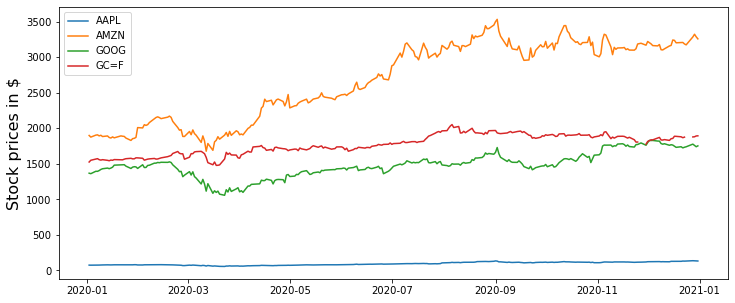

In [3]:
my_stocks = data

# Create and plot the graph
plt.figure(figsize=(12,5)) 

# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

plt.ylabel('Stock prices in $',fontsize=16)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

Note the graph is not very informative because the evolution depends on stock level (AMZN and GOOG are trading at very high levels)

Let's remove the levels and visualize the evolution of $1 in 2020

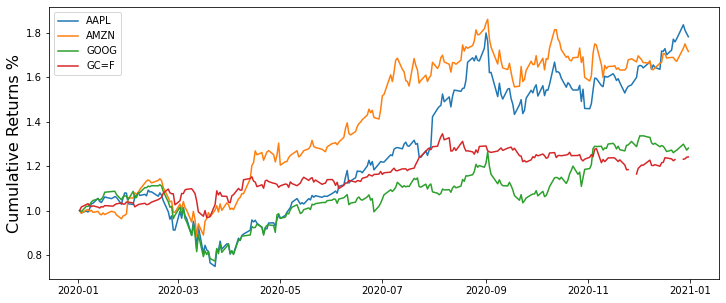

In [4]:
CumReturns = data.apply(lambda x: (x / x[0]))

plt.figure(figsize=(12,5))

# Plot the returns
for c in my_stocks.columns.values: 
    plt.plot(CumReturns[c], label=c)
    
plt.ylabel('Cumulative Returns %',fontsize=16)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()    



### Stock performance in current year

In [5]:
# Annualized mean and sd returns
print('Mean ',252*returns.mean())
print('\nVol ', np.sqrt(252*returns.var()))

# Daily VaR at 1% level (maximul loss with 1% probability, or 1%-percentile)
print('\nVaR-1%',returns.quantile(.01))

# Sharpe ratio: combine return and risk in just one number
print('\n SR',np.sqrt(252)*returns.mean()/np.sqrt(returns.var()))

Mean  Symbols
AAPL    0.687334
AMZN    0.614203
GOOG    0.321416
GC=F    0.239672
dtype: float64

Vol  Symbols
AAPL    0.466993
AMZN    0.385110
GOOG    0.383372
GC=F    0.215019
dtype: float64

VaR-1% Symbols
AAPL   -0.079567
AMZN   -0.054069
GOOG   -0.060079
GC=F   -0.045804
Name: 0.01, dtype: float64

 SR Symbols
AAPL    1.471829
AMZN    1.594877
GOOG    0.838391
GC=F    1.114653
dtype: float64


Which stock is the best in terms of profit? Would you invest in it?

And in terms of risk? Would you invest in it?

And in terms of SR?

### The efficient frontier view

Text(0, 0.5, 'annual return')

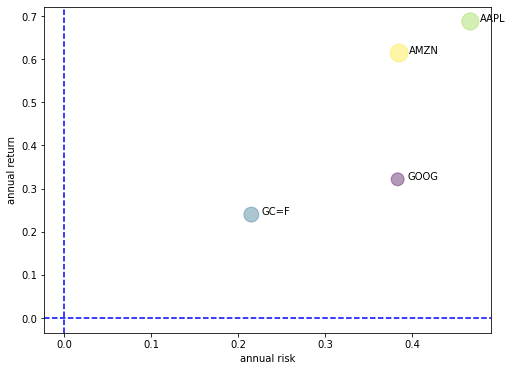

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
#ax.grid(c = (0.75, 0.75, 0.99))
ax.axhline(y = 0.0,xmin = 0 ,xmax = 1,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')
ax.axvline(x = 0.0,ymin = 0 ,ymax = 1,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')

ax.scatter(np.sqrt(252*returns.var()),252*returns.mean(),s=200*np.sqrt(252)*returns.mean()/np.sqrt(returns.var()),
           c=np.sqrt(252)*returns.mean()/np.sqrt(returns.var()),marker='o',alpha=0.4)

for i, txt in enumerate(returns.columns):
        ax.annotate(txt, (np.sqrt(252*returns.var())[i],252*returns.mean()[i]), xytext=(10,0), textcoords='offset points')
plt.xlabel('annual risk')
plt.ylabel('annual return')

Amazon is dominating the other stocks in 2020

To balance better profit/loss and risk, we should diversify: invest in all the stocks

But how?

Let’s say we have an initial portfolio made up of 50% Apple stock, 20% Amazon stock, 20% Google stock and 10% Microsoft

We can calculate the portfolio expected return and volatility as follows


In [7]:
# Mean daily return and covariance matrix
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

# Our initial portfolio strategy
weights = np.array([0.5,0.2,0.2,0.1])

# Annualized portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)

# Annualized portfolio risk (volatility)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)

print('Portfolio annualized return: {} with volatility: {}'.format(portfolio_return,portfolio_std_dev))

print('\nSharpe ratio:',portfolio_return/portfolio_std_dev)

p_daily_returns=np.dot(returns, weights)

print('\nVaR-1%:', np.nanquantile(p_daily_returns,0.01))

Portfolio annualized return: 0.55 with volatility: 0.36

Sharpe ratio: 1.527777777777778

VaR-1%: -0.06111935923556686


Note performance is better balancing return and risk

### But can we even improve this balance?

To do that, we should optimize the trade-off between portfolio return and risk

Note the portfolio risk depends on the covariance matrix

In [8]:
returns.corr()

Symbols,AAPL,AMZN,GOOG,GC=F
Symbols,,,,
AAPL,1.000000,0.697236,0.751909,0.178733
AMZN,0.697236,1.000000,0.679870,0.166013
GOOG,0.751909,0.679870,1.000000,0.139920
GC=F,0.178733,0.166013,0.139920,1.000000


### The optimization model

We will use here scipy for the optimization, but any other package can be used

In [9]:
from scipy.optimize import minimize

mu = mean_daily_returns
covar = cov_matrix

def portfolio(x, mu, covar, gamma):
    return -np.dot(x,mu)+0.5*gamma*np.dot(np.dot(x,covar),x)    

cons = ({'type': 'eq','fun' : lambda x: sum(x)-1})
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))
gamma=1 # risk-aversion parameter, the lower the more risky
x0 = np.array([0, 0, 0, 0])

res = minimize(portfolio, x0, args=(mu, covar, gamma), method='SLSQP', constraints=cons, bounds=bounds, options={'disp': True,'ftol': 1e-10})


Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.0023013777589521657
            Iterations: 16
            Function evaluations: 80
            Gradient evaluations: 16


In [10]:
# Our final portfolio strategy
weights = np.array(res.x)

print('Recommended portfolio weights:', np.round(weights,2)) 

# Annualized portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)

# Annualized portfolio risk (volatility)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)

print('\nPortfolio annualized return: {} with volatility: {}'.format(portfolio_return,portfolio_std_dev))

print('\nSharpe ratio:',portfolio_return/portfolio_std_dev)

p_daily_returns=np.dot(returns, weights)

print('\nVaR-1%:', np.nanquantile(p_daily_returns,0.01))

Recommended portfolio weights: [0.83 0.17 0.   0.  ]

Portfolio annualized return: 0.67 with volatility: 0.44

Sharpe ratio: 1.5227272727272727

VaR-1%: -0.0744968706799441


By investing most of our money in AMZN, less in GOOG, a bit in AAPL, and anything in MSFT, we could have obtained a very good performance this year

### Efficient frontier view of portfolio

Text(0, 0.5, 'annual return')

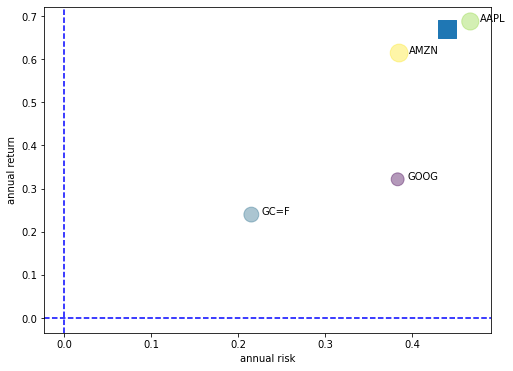

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
#ax.grid(c = (0.75, 0.75, 0.99))
ax.axhline(y = 0.0,xmin = 0 ,xmax = 1,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')
ax.axvline(x = 0.0,ymin = 0 ,ymax = 1,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')

ax.scatter(np.sqrt(252*returns.var()),252*returns.mean(),s=200*np.sqrt(252)*returns.mean()/np.sqrt(returns.var()),
           c=np.sqrt(252)*returns.mean()/np.sqrt(returns.var()),marker='o',alpha=0.4)

for i, txt in enumerate(returns.columns):
        ax.annotate(txt, (np.sqrt(252*returns.var())[i],252*returns.mean()[i]), xytext=(10,0), textcoords='offset points')

# Portfolio        
ax.scatter(portfolio_std_dev, portfolio_return, s=200*portfolio_return/portfolio_std_dev, marker="s")

plt.xlabel('annual risk')
plt.ylabel('annual return')

Evolution of $1 in 2020 using this portfolio strategy

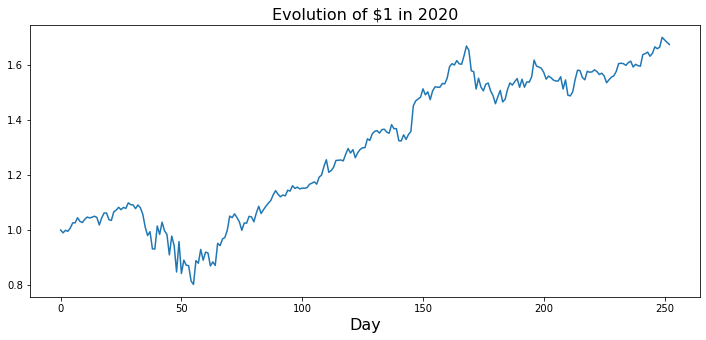

In [12]:
plt.figure(figsize=(12,5))

p_daily_returns[0]=1

# Plot the returns
plt.plot(p_daily_returns.cumsum())
    
plt.title('Evolution of $1 in 2020',fontsize=16)
plt.xlabel('Day',fontsize=16)
plt.show()   

### Interpretation

If we had invested $1 in this portfolio strategy at the beginning of 2020, today we would have 50\% more. On March, we would have lost 10\%.

This is a conservative strategy with $\gamma=10$. You should try other investment strategies changing risk-aversion parameter gamma: the smaller the more risk you take

Finally note this is not a realistic backtest, because we are using the same data to train and test.




### Final notes

Realistic backtesting: 

- take a longer history

- consider the first 100 days to estimate the parameters and compute portfolio weights, $w_0$, using the quadratic model

- leave this strategy for, let's say, one month, and evaluate there the performance: $w_0' R_1$, where $R_1$ contains the one-month ahead returns for the stocks

- compute there the portfolio weights, $w_1$, using now the returns from the last month and removing the first month in the dataset

- repeat many months

You should compare your strategy with relevant benchmarks: 1/N and the index (S&P500)

Take care: portfolio means change a lot along time whereas volatilities and correlations change less and are more smooth. Hence, strategies based on volatilities and correlations tend to perform better

Last advice: past performance does not guarantee future performance
